In [79]:
#!pip install pyswarms
import pyswarms as ps
from google.colab import drive
import os
#Mount Google Drive
#drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Pricing-derivatives/exotic-stock-options')
print(os.getcwd())

/content/drive/My Drive/LEARN/Finance/quantitative finance/Pricing-derivatives/exotic-stock-options


               Close      High       Low      Open    Volume
Price                                                       
2000-03-28  1.919621  1.953299  1.683878  1.885943  23025200
2000-03-29  2.020654  2.121686  2.020654  2.071171   9124500
2000-03-30  1.953300  2.037493  1.784911  2.020655   3688300
2000-03-31  1.970138  2.020654  1.953299  2.020654   3083300
2000-04-03  1.936460  1.970138  1.768073  1.885944   5897100
                Close       High        Low       Open   Volume
Price                                                          
2025-07-07  33.480000  33.700001  33.279999  33.700001  3981700
2025-07-08  33.599998  33.799999  33.570000  33.580002  4821200
2025-07-09  33.750000  33.750000  33.450001  33.660000  5031300
2025-07-10  33.419998  33.450001  33.220001  33.430000  4717300
2025-07-11  33.279999  33.310001  33.040001  33.139999  5074000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6360 entries, 2000-03-28 to 2025-07-11
Data columns (total 5 columns):
 

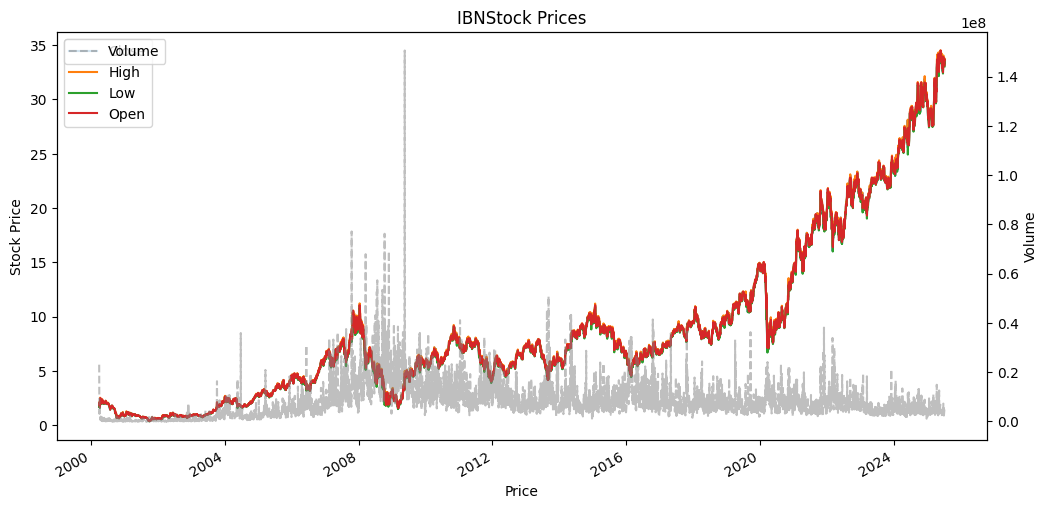

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6360 entries, 2000-03-28 to 2025-07-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6360 non-null   float64
dtypes: float64(1)
memory usage: 99.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   contractSymbol     153 non-null    object        
 1   lastTradeDate      153 non-null    datetime64[ns]
 2   strike             153 non-null    int64         
 3   lastPrice          153 non-null    float64       
 4   bid                153 non-null    float64       
 5   ask                153 non-null    float64       
 6   change             153 non-null    int64         
 7   percentChange      153 non-null    int64         
 8   volume             129 non-null    float64       
 9   openInter

In [80]:
%run option_analysis.ipynb
%run loss_minimization.ipynb
%run bayesian_prior_posterior.ipynb
%run exact_binomial_model.ipynb
%run monte_carlo.ipynb
%run black_scholes_merton.ipynb
%run merton_jump_diffusion.ipynb
%run heston.ipynb
%run stock_option_data.ipynb
%run option_pricing.ipynb


predictor = OptionPredictor('IBN', '2020-01-01', date.today(), 'Close')
predictor.data_initiation()

# Option  Pricing : Monte Carlo simulations

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


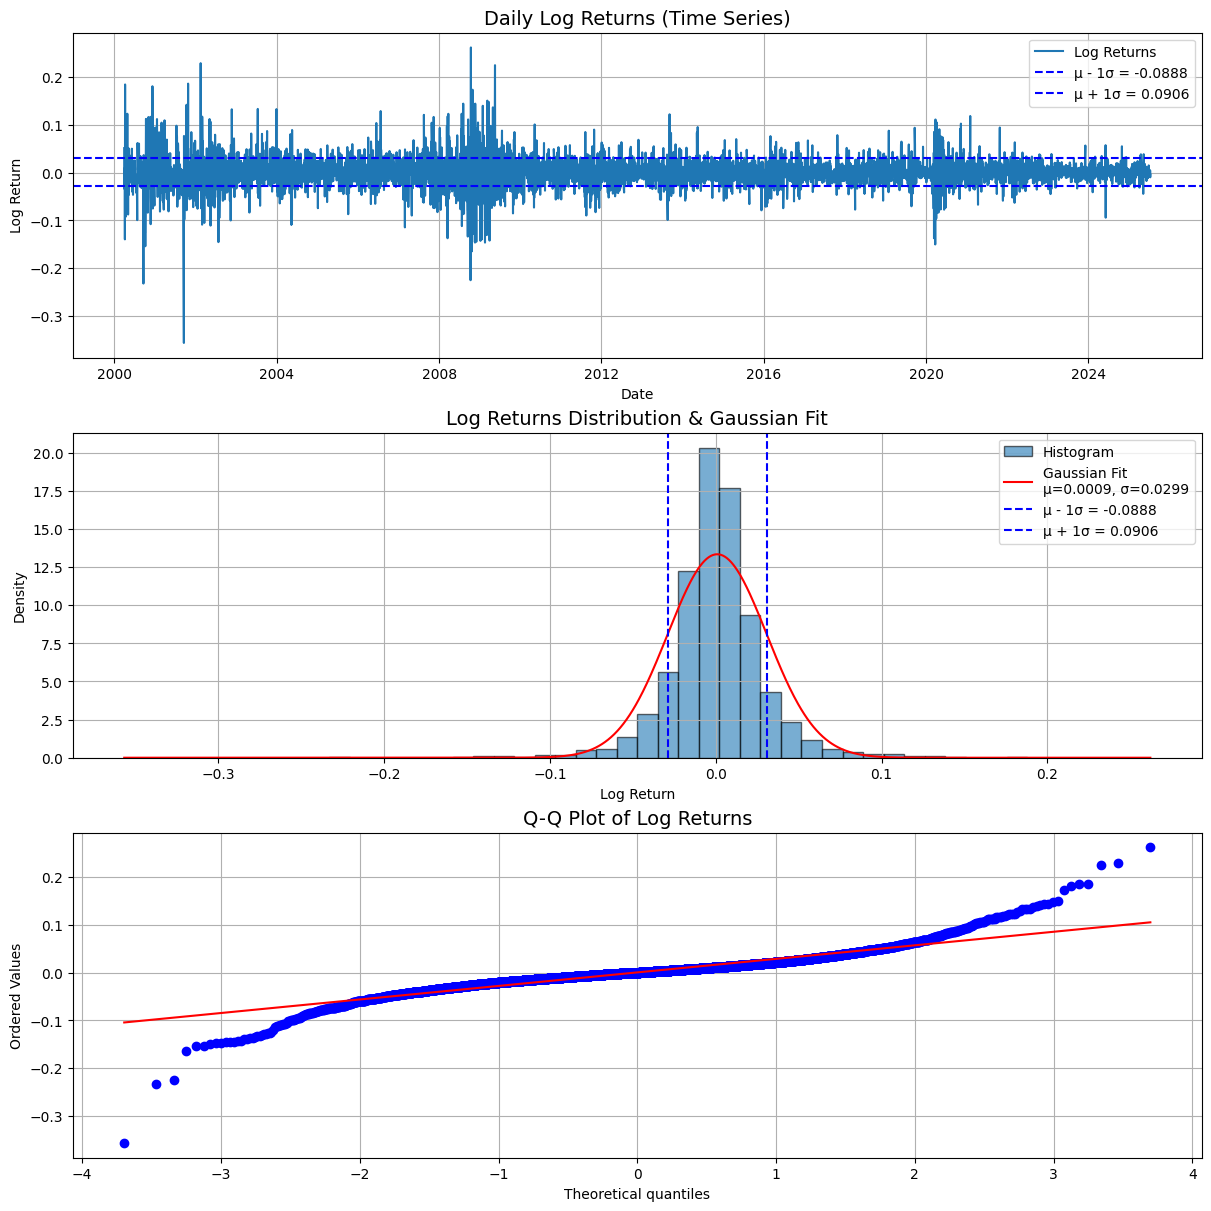

/tmp/ipython-input-80-399947757.py:107: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  simulated_prices[ii, t] = simulated_prices[ii, t - 1] * (1 + self.rfr * dt + sigma_sample * np.sqrt(dt) * z)


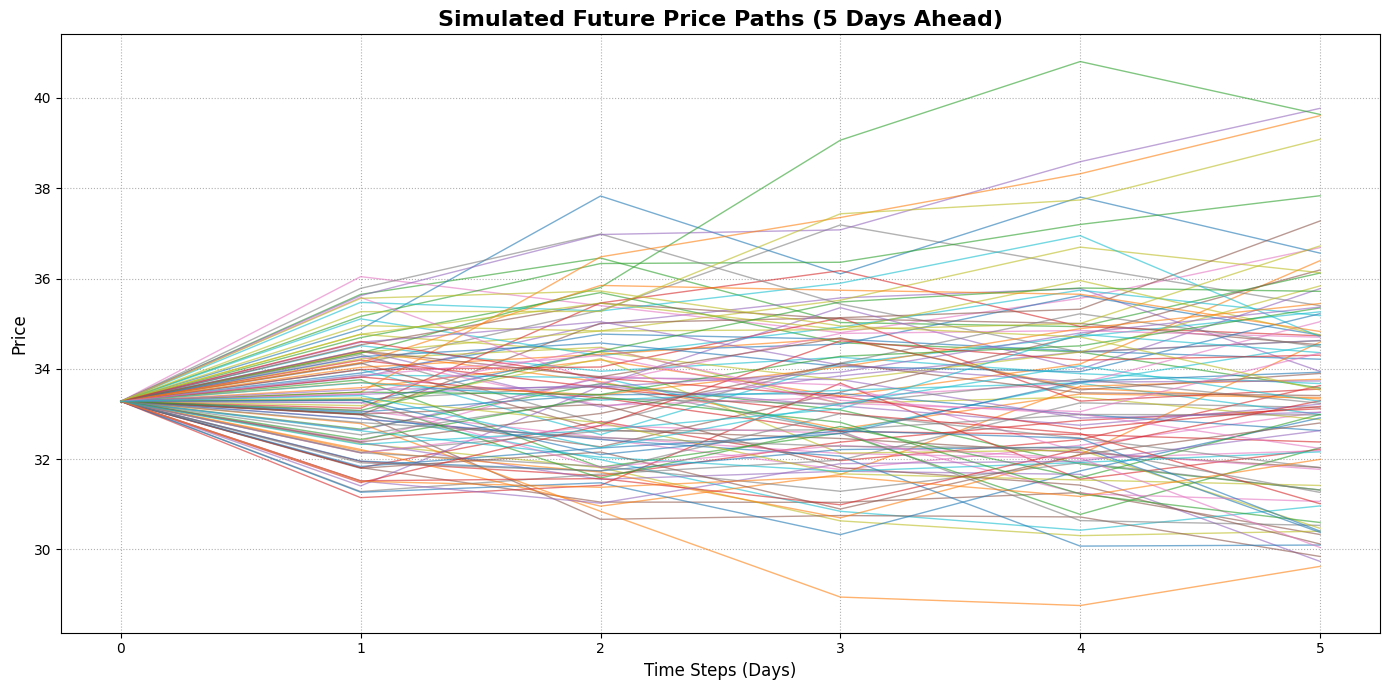

  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_vanilla  cal_price_asian  
0           4.607118         4.466346  
1           3.615897         3.467140  
2           6.937586         4.582301  
3           8.099066         5.769266  


In [81]:
predictor.run_mcmc(npath = 100, option_name = 'asian-geom', model_type='BSM', exercise_type='european')

#options available on option   - asian-geom ,
#options available on model    - btree , BSM , Merton , Heston
#options available on exercise - european , american, bermudan(fictitious exercise days)

# for Heston - params are calculated using loss minimization via particle swarm optimization (loss = market vs model option price) : WIP

# *NUMERICAL* SOLUTION - always underprocess

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


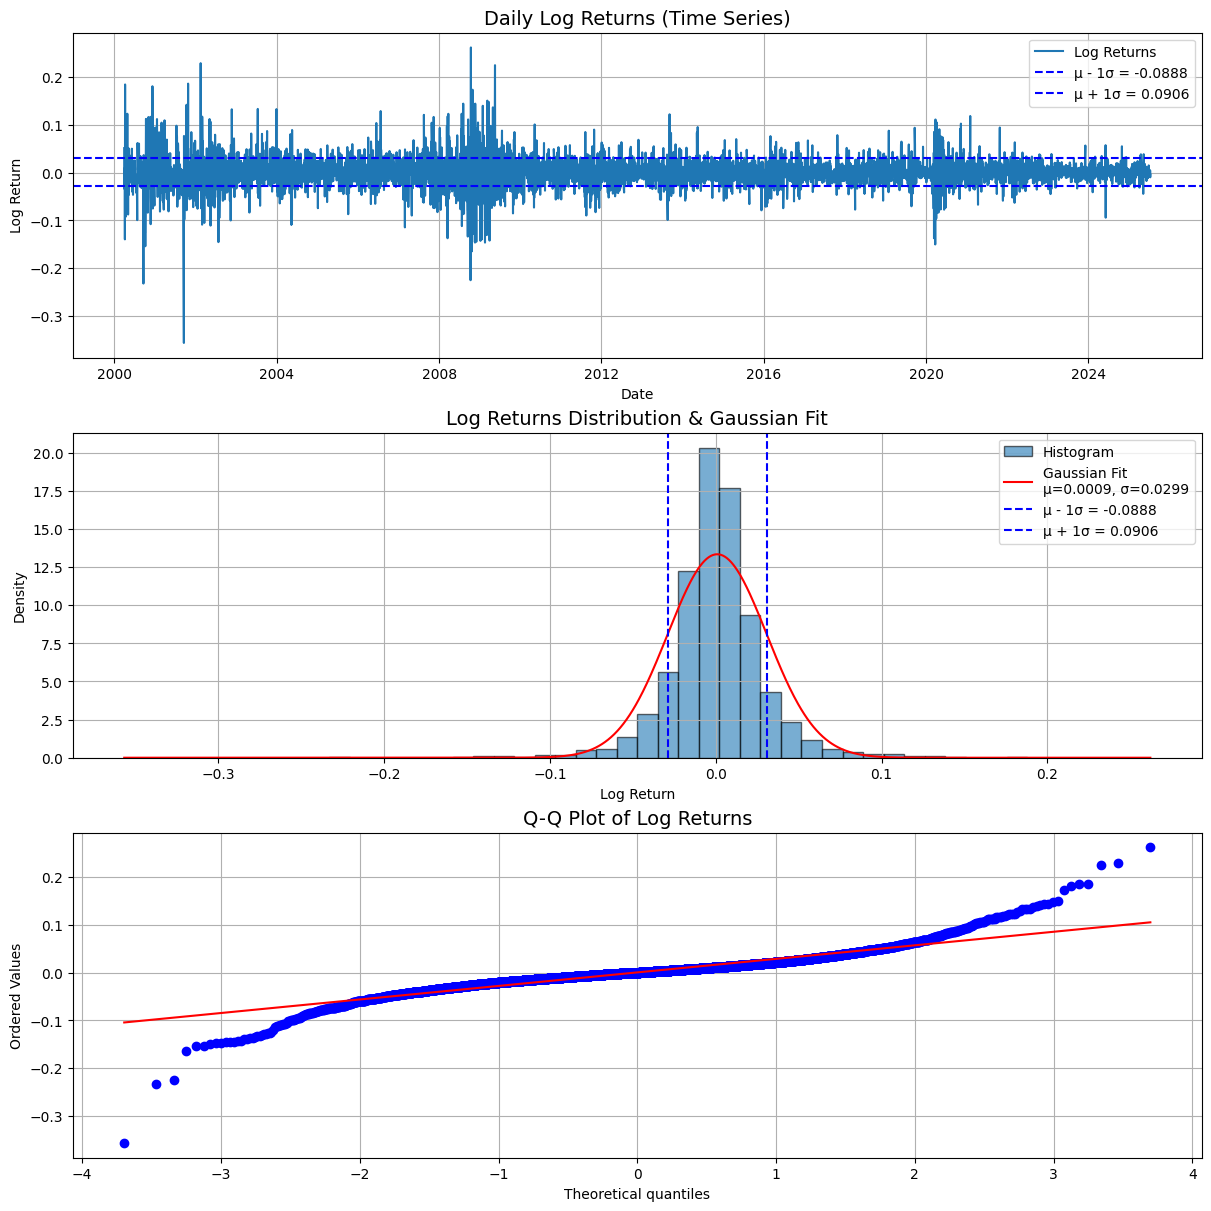

Crank-Nicholson PDE--------------------------------------------------


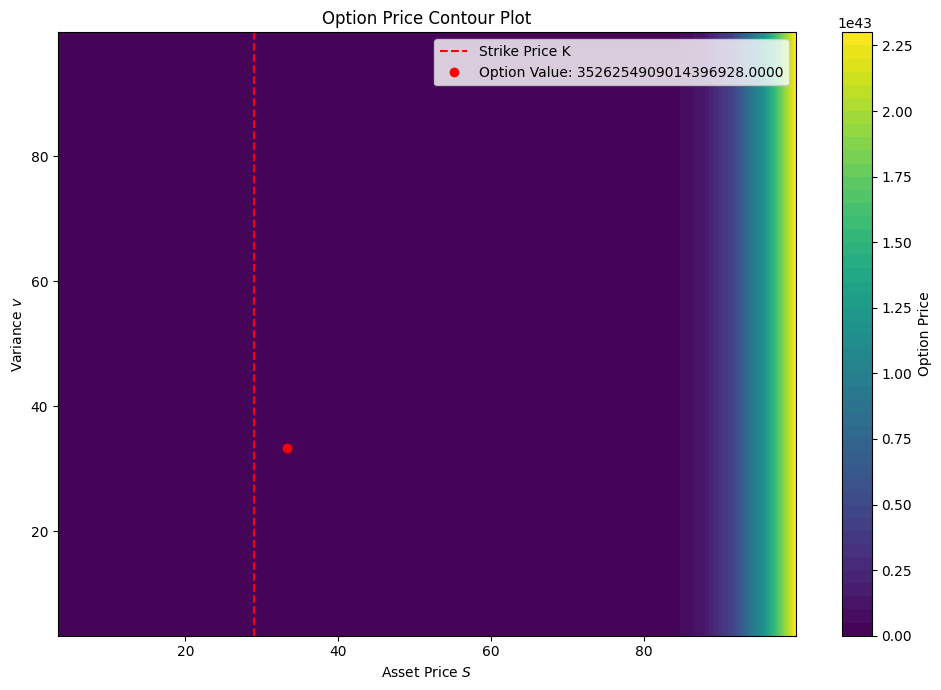

  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_closed  cal_price_cn_asian  
0          4.317523        3.526255e+18  
1          3.357137        3.526255e+18  
2          7.523681        1.992656e-01  
3          8.701112        2.073914e-01  


In [82]:
predictor.run_sde_numerical_pde(option_name= 'asian-geom', model_type='BSM', exercise_type='european')

##options available on option   - asian-geom ,
#Options available on model     - BSM ,
#Options available on exercise  - european , american, bermudan

#* for bermudan, exercise dates are (by choice) the last two consecutive days before each (expiry -1) time

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


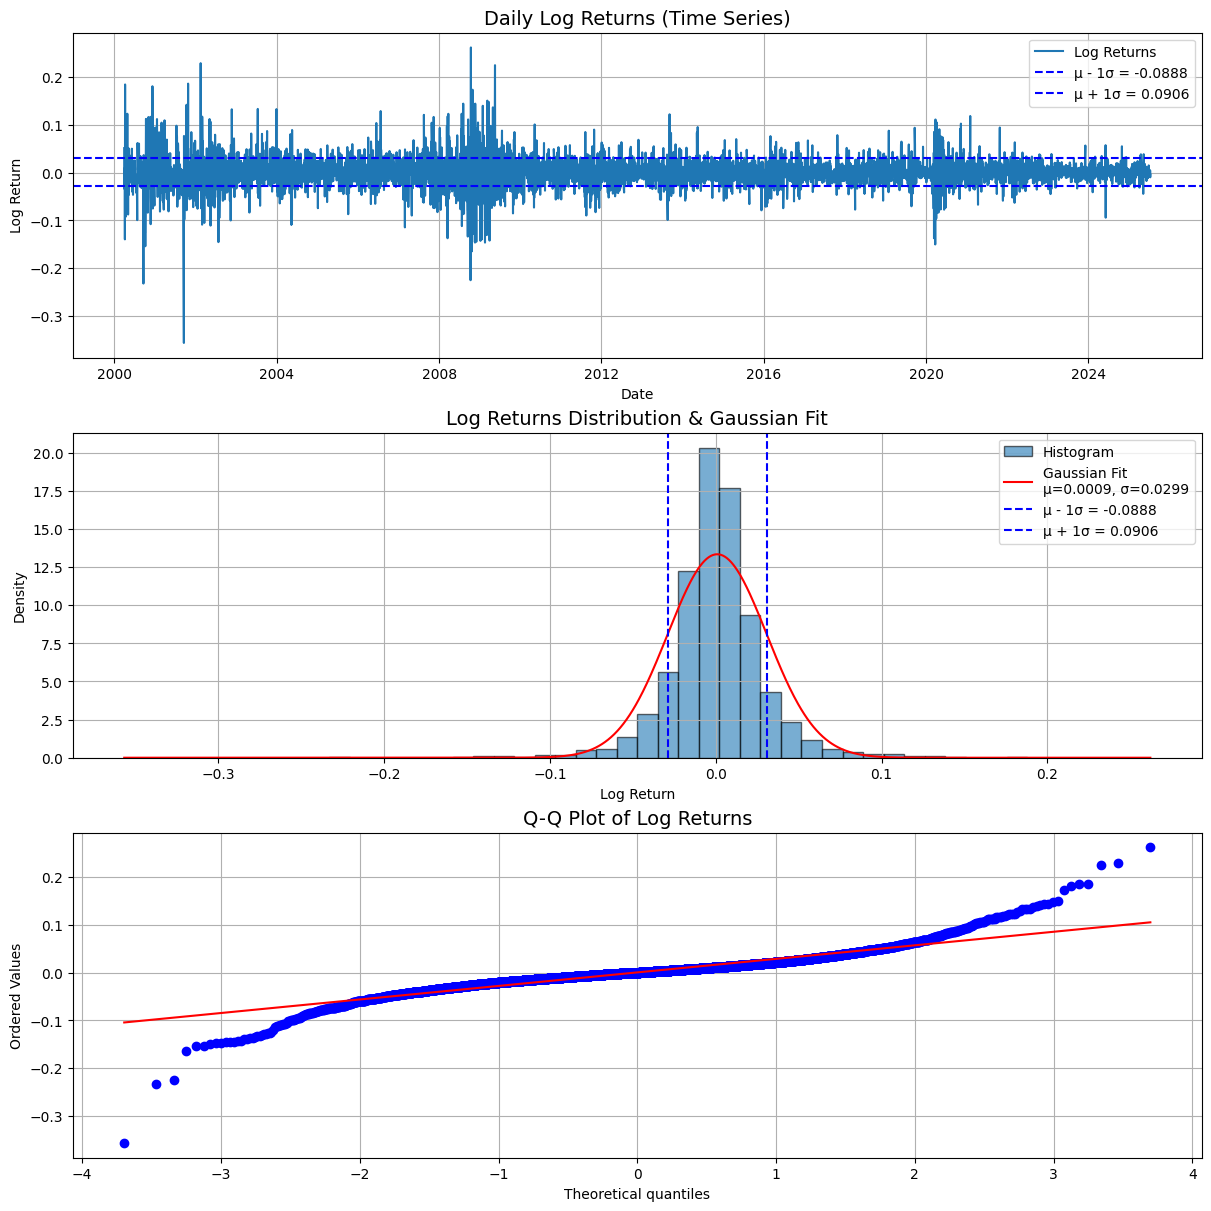

Characteristic function - Fourier cosine expansion - COS FFT --------------------------------------------------
  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_closed  cal_price_COS_asian  
0          4.317523             4.277472  
1          3.357137             3.279549  
2          7.523681             5.190932  
3          8.701112             6.418019  


In [83]:
predictor.run_sde_numerical_cf(option_name = 'asian-geom' , model_type='BSM')

#options available on options   - asian-geom ,
#Options available on model     - BSM
#Options available on exercise  - european

# *CLOSED* form solution

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


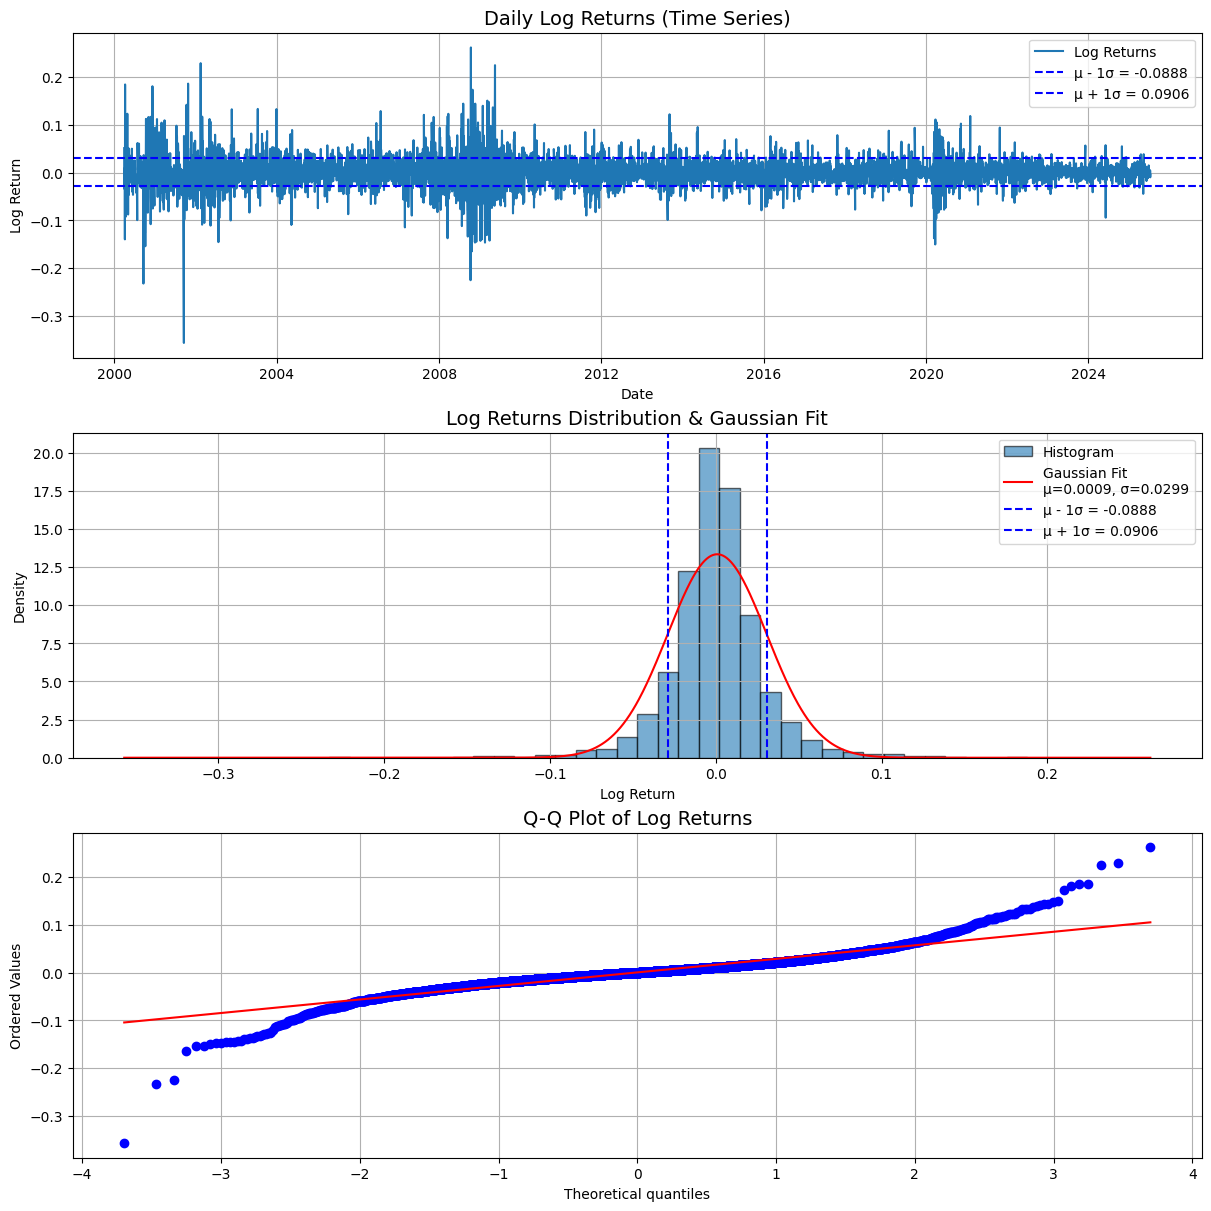

  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_closed  cal_price_asian  
0          4.317523         4.042380  
1          3.357137         3.046545  
2          7.523681         5.222326  
3          8.701112         6.453171  


In [84]:
predictor.run_sde_closed(option_name = 'asian-geom', model_type='BSM')

#options available on options   - asian-geom ,
#Options available              - BSM ,

# Option  Pricing : Exact binomial tree

Daily mu (sigma) = 0.09% ± 2.99%
Annual mu (sigma) = 22.56% ± 47.45%


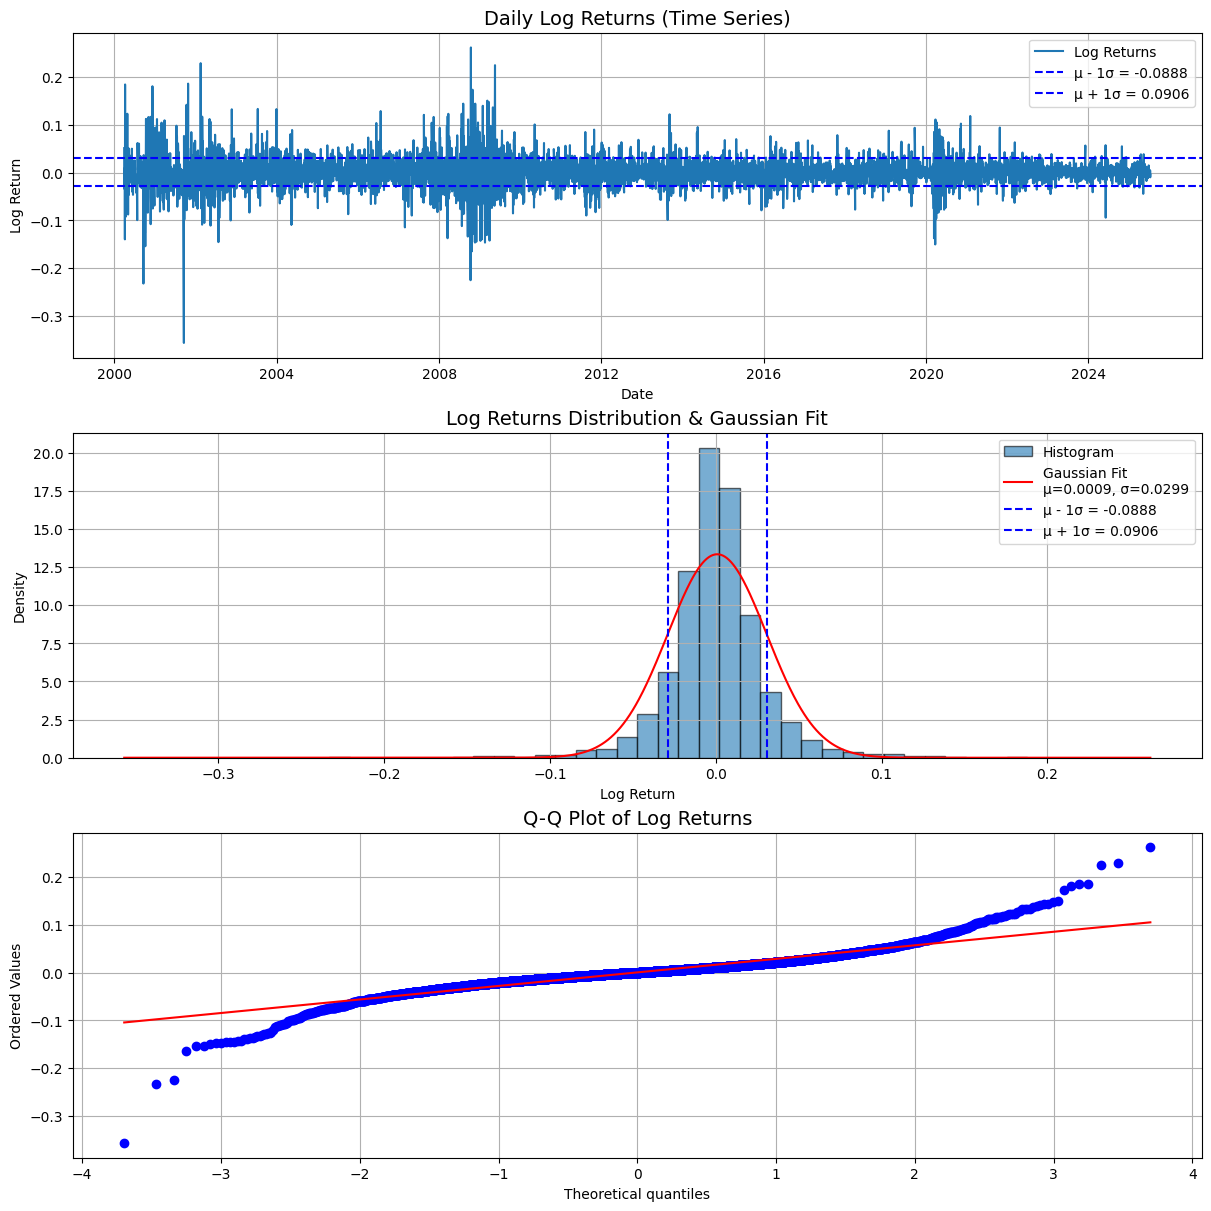

  expirations option_type  strike  obs_price        IV  Maturity  \
0  2025-07-18        call    29.0       4.12  0.000010      0.01   
1  2025-07-18        call    30.0       2.83  0.000010      0.01   
2  2027-01-15         put    35.0       3.36  0.000010      1.56   
3  2027-01-15         put    37.0       5.00  0.146615      1.56   

   cal_price_vanilla  cal_price_asian  
0           4.314149         3.454283  
1           3.347701         2.455077  
2           7.527261        31.236184  
3           8.703645        33.114638  


In [85]:
predictor.run_btree(option_name = 'asian-geom', model_type='CRR', exercise_type='european')

#options available on options  - asian-geom ,
#options available on model    - CRR
#options available on exercise - european , american, bermudan (fictitious exercise days)